In [1]:
#first experiment: XGBoost PhysicalChem Descriptors
import xgboost as xgb
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# with open('../confirmed_liquids.pkl','rb') as f:
#     liquids_molregnos = pickle.load(f)

def XGBOOST_random_splits(params, descriptors,name):
    pred_list,ys_list,molregnos = [],[],[]
    for i in range(10):
        df_train = pd.read_csv('splits/OPERA_Naef_Training_'+str(i)+'.csv')
        df_val = pd.read_csv('splits/OPERA_Naef_Validation_'+str(i)+'.csv')
        #filter out non-liquids
        # df_train = df_train[df_train['molregno'].isin(liquids_molregnos)]
        # df_val = df_val[df_val['molregno'].isin(liquids_molregnos)]

        train_X = df_train[descriptors]
        train_y = df_train['vp_log10_pa']
        val_X = df_val[descriptors]
        val_y = df_val['vp_log10_pa']
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dval = xgb.DMatrix(val_X, label=val_y)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )
        preds = model.predict(dval)
        rmse = mean_squared_error(val_y, preds, squared=False)
        pred_list.append(preds)
        ys_list.append(val_y)
        molregnos.append(df_val['molregno'])
        print(f"Split {i + 1}: RMSE = {rmse}")
        #save model as pickle
        model.save_model(f'models/{name}_{i}.json')
    return pred_list, ys_list, molregnos
  

In [2]:
params = { #hyperparameters optimized by Working Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
from rdkit.Chem import Descriptors
RDKit_feature_names = list(Descriptors.descList)
RDKit_feature_names = [i[0] for i in RDKit_feature_names]   
pred_list_xgboost_physchem, ys_list_xgboost_physchem, molregnos_xgboost_physchem = XGBOOST_random_splits(params, RDKit_feature_names, 'XGBOOST_PhysicalChem_Descriptors')

Split 1: RMSE = 0.7836812724536251
Split 2: RMSE = 0.7850215898788516
Split 3: RMSE = 0.8035068280807065
Split 4: RMSE = 0.8398868642950832
Split 5: RMSE = 0.8178513150555903
Split 6: RMSE = 0.7800556142554531
Split 7: RMSE = 0.8465802994926203
Split 8: RMSE = 0.8389064121621426
Split 9: RMSE = 0.7703268564177125
Split 10: RMSE = 0.8174000594564026


In [3]:
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
                     'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
pred_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus = XGBOOST_random_splits(params, mdfp_features_all, 'XGBOOST_MDFP')

Split 1: RMSE = 0.8179126715522688
Split 2: RMSE = 0.855459843743086
Split 3: RMSE = 0.852480210564891
Split 4: RMSE = 0.9779578022388736
Split 5: RMSE = 0.9392495559471412
Split 6: RMSE = 0.9919526010317234
Split 7: RMSE = 0.9362543164415533
Split 8: RMSE = 0.9410757959932815
Split 9: RMSE = 0.9018027543028057
Split 10: RMSE = 0.9302575243219328


In [4]:
mdfp_features_sim_only = ['water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
pred_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_and_physchem, molregnos_xgboost_mdfp_and_physchem = XGBOOST_random_splits(params, mdfp_features_sim_only + list(RDKit_feature_names), 'XGBOOST_MDFP_PhysicalChem')

Split 1: RMSE = 0.739513594567825
Split 2: RMSE = 0.7981939620152302
Split 3: RMSE = 0.8378140911444665
Split 4: RMSE = 0.8890114918006972
Split 5: RMSE = 0.847353974684178
Split 6: RMSE = 0.8102400873477106
Split 7: RMSE = 0.813973836508607
Split 8: RMSE = 0.8221373015633604
Split 9: RMSE = 0.7789659515914691
Split 10: RMSE = 0.9022495147327904


In [5]:
features_2d_counts = [f for f in mdfp_features_all if f not in mdfp_features_sim_only]
pred_list_xgboost_mdfp_counts, ys_list_xgboost_mdfp_counts, molregnos_xgboost_mdfp_counts = XGBOOST_random_splits(params, features_2d_counts, 'XGBOOST_MDFP_2DCounts')

Split 1: RMSE = 1.245143098280475
Split 2: RMSE = 1.4393309664026461
Split 3: RMSE = 1.1930275080592934
Split 4: RMSE = 1.4122749419590357
Split 5: RMSE = 1.275771721949446
Split 6: RMSE = 1.5070007762962456
Split 7: RMSE = 1.4187777305834013
Split 8: RMSE = 1.369684408494091
Split 9: RMSE = 1.4282491642518154
Split 10: RMSE = 1.3652059418491738


In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    median_AE = median_absolute_error(np.array(x), np.array(y))

    return RMSE, MAE, EBO, KT, median_AE

def density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, print_stats=True, bounds=None, title=None, print_spearman=False, name=None, dims = (1, 3)):
    # fig, axes = plt.subplots(1, len(reals_list), figsize=(10 * len(reals_list), 8))
    #assert that len(reals_list) is smaller then the number of subplots
    assert len(reals_list) <= dims[0]*dims[1]
    fig, axes = plt.subplots(dims[0], dims[1], figsize=(10 * dims[1], 8 * dims[0]))
    axes = axes.flatten()
    for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
        ax = axes[i] if len(reals_list) > 1 else axes


    # for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
    #     ax = axes[i] if len(reals_list) > 1 else axes

        rmses, maes, ebos, kts, median_aes = [], [], [], [], []

        for r, p in zip(reals, predictions):
            RMSE, MAE, EBO, KT, median_AE = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            median_aes.append(median_AE)

        rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
        rmse_mean = np.mean(rmses)
        mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
        kt_mean = np.mean(kts)
        median_AE_90_low, median_AE_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(median_aes), scale=stats.sem(median_aes))
        median_AE_mean = np.mean(median_aes)

        mrn = [item for sublist in molregnos for item in sublist]
        real = [item for sublist in reals for item in sublist]
        prediction = [item for sublist in predictions for item in sublist]

        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()

        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")

        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]

        ax.axis([lower, upper, lower, upper])

        text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMedian AE: {median_AE_mean:.2f} ({median_AE_90_low:.2f}-{median_AE_90_high:.2f})\nMean AE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})',
                           transform=ax.transAxes, fontsize=12, verticalalignment='top',
                           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        if title is not None:
            ax.set_title(title[i] if len(reals_list) > 1 else title, fontsize=14)

        ax.set_aspect('equal', 'box')

    if name:
        plt.savefig(f'{name}.png', dpi=800, bbox_inches='tight')
    else:
        plt.show()


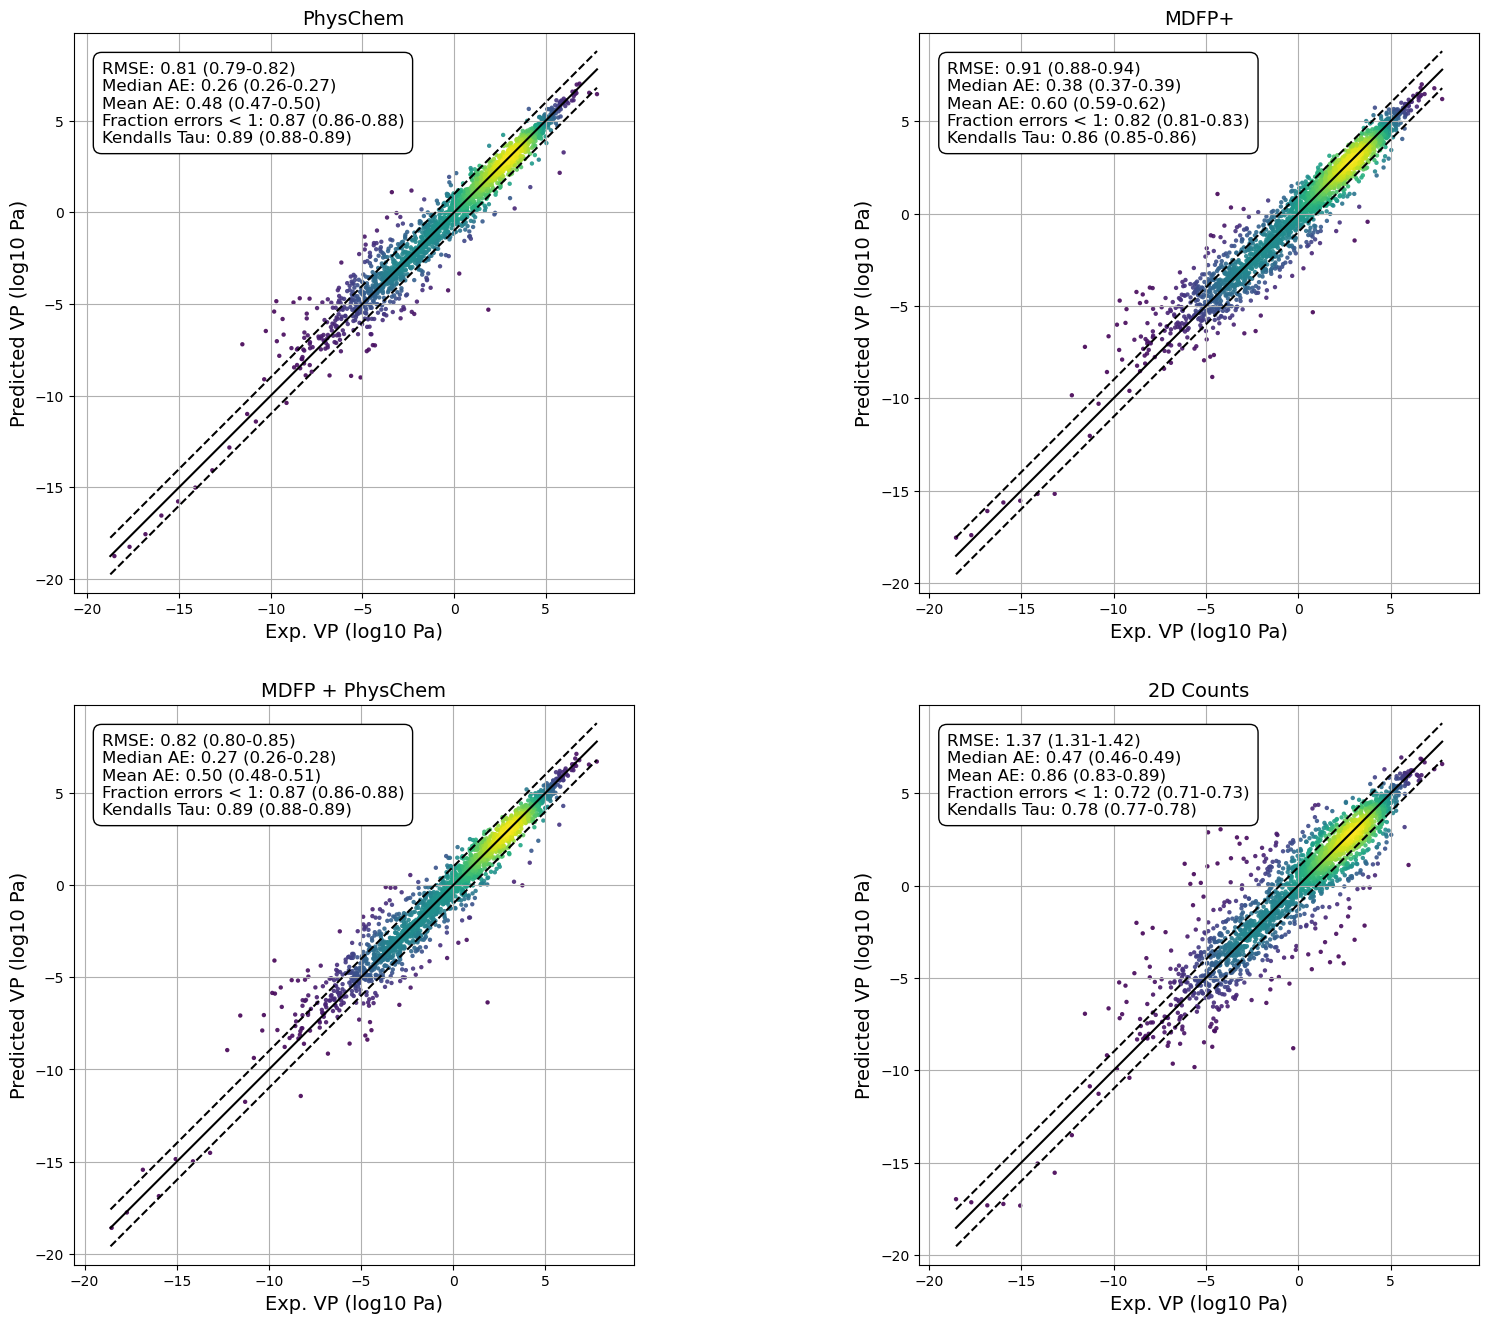

In [7]:
reals_list = [ys_list_xgboost_physchem, ys_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_counts]
predictions_list = [pred_list_xgboost_physchem, pred_list_xgboost_mdfp_plus, pred_list_xgboost_mdfp_and_physchem, pred_list_xgboost_mdfp_counts]
molregnos_list = [molregnos_xgboost_physchem, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_counts]
title = ['PhysChem', 'MDFP+', 'MDFP + PhysChem', '2D Counts']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts', dims=(2,2))

In [8]:
#make df with all preds, calculate error for each descriptor, get subset with error > 1 for all methods
df_all = pd.DataFrame()
df_all['molregno'] = [item for sublist in molregnos_xgboost_physchem for item in sublist]
df_all['PhysChem'] = [item for sublist in pred_list_xgboost_physchem for item in sublist]
df_all['MDFP+'] = [item for sublist in pred_list_xgboost_mdfp_plus for item in sublist]
df_all['MDFP+PhysChem'] = [item for sublist in pred_list_xgboost_mdfp_and_physchem for item in sublist]
df_all['2DCounts'] = [item for sublist in pred_list_xgboost_mdfp_counts for item in sublist]
df_all['VP'] = [item for sublist in ys_list_xgboost_physchem for item in sublist]

df_all['PhysChem_error'] = abs(df_all['PhysChem'] - df_all['VP'])
df_all['MDFP+_error'] = abs(df_all['MDFP+'] - df_all['VP'])
df_all['MDFP+PhysChem_error'] = abs(df_all['MDFP+PhysChem'] - df_all['VP'])
df_all['2DCounts_error'] = abs(df_all['2DCounts'] - df_all['VP'])

df_error = df_all[(df_all['PhysChem_error'] > 1) & (df_all['MDFP+_error'] > 1) & (df_all['MDFP+PhysChem_error'] > 1) & (df_all['2DCounts_error'] > 1)]

#get smiles via /localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/cs_mdfps_schema_experimental_data.csv
df_exp_vals = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/cs_mdfps_schema_experimental_data.csv')
df_exp_vals = df_exp_vals[['molregno', 'smiles']]
df_exp_vals = df_exp_vals.drop_duplicates()
df_exp_vals = df_exp_vals.set_index('molregno')
df_error = df_error.set_index('molregno')

df_error = df_error.join(df_exp_vals)
df_error

,PhysChem,MDFP+,MDFP+PhysChem,2DCounts,VP,PhysChem_error,MDFP+_error,MDFP+PhysChem_error,2DCounts_error,smiles
molregno,,,,,,,,,,
20,-6.702162,-3.138782,-5.629261,-7.937395,-4.554298,2.147864,1.415516,1.074964,3.383097,O=C1c2ccccc2C(=O)c2c(O)cccc21
23,-3.158541,-4.350352,-3.949484,-6.782534,-5.480597,2.322056,1.130246,1.531113,1.301937,CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N...
86,-3.276787,-3.345823,-3.334808,-3.006655,-4.639598,1.362810,1.293774,1.304789,1.632943,CCN(CC)C(=O)[C@@H](C)Oc1cccc2ccccc12
86,-3.276350,-3.531397,-3.294427,-3.288282,-4.639598,1.363248,1.108200,1.345170,1.351315,CCN(CC)C(=O)[C@@H](C)Oc1cccc2ccccc12
92,-1.326902,-0.321795,-0.599227,-0.387804,0.822502,2.149404,1.144297,1.421729,1.210305,O=C(O)CCS
...,...,...,...,...,...,...,...,...,...,...
16990,-4.933007,-5.547767,-5.073996,-5.184474,-6.698998,1.765991,1.151232,1.625002,1.514525,Clc1cc2c(cc1Cl)Oc1cc(Cl)c(Cl)cc1O2
17101,-0.474410,-1.560579,-0.855830,0.263113,-2.560799,2.086389,1.000220,1.704969,2.823912,O=C(O)/C=C/c1ccccc1
17101,-1.029567,-1.533478,-1.017624,0.365514,-2.560799,1.531232,1.027321,1.543175,2.926313,O=C(O)/C=C/c1ccccc1


In [9]:
#load /localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiments/confirmed_liquids.pkl
import pickle
with open('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiments/confirmed_liquids.pkl','rb') as f:
    liquids_molregnos = pickle.load(f)
#get subset of confirmed liquids
df_error_liquids = df_error[df_error.index.isin(liquids_molregnos)]
#drop duplicates (on molregno)
df_error_liquids = df_error_liquids.drop_duplicates(subset='smiles')
df_error_liquids


,PhysChem,MDFP+,MDFP+PhysChem,2DCounts,VP,PhysChem_error,MDFP+_error,MDFP+PhysChem_error,2DCounts_error,smiles
molregno,,,,,,,,,,
723,-1.604864,-1.720803,-1.743477,-2.416073,0.912402,2.517266,2.633205,2.655878,3.328475,O=P(OCCCl)(OCCCl)OCCCl
2563,0.472648,-2.001686,1.930594,-1.208827,3.050202,2.577554,5.051888,1.119608,4.259029,O=[N+]([O-])C([N+](=O)[O-])([N+](=O)[O-])[N+](...
2778,-0.159919,-1.004653,-0.445753,-1.218124,1.052502,1.212421,2.057154,1.498254,2.270625,CCOC(=O)c1ccccc1O
2850,0.479737,0.421612,0.073969,0.682488,1.898002,1.418265,1.476390,1.824033,1.215514,O=Cc1ccccc1O
2875,-5.948981,0.227228,-8.226305,-0.657237,1.866521,7.815502,1.639294,10.092826,2.523759,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...
3122,0.094465,0.532267,0.233106,0.381869,1.680002,1.585538,1.147736,1.446896,1.298134,Cc1cccc([N+](=O)[O-])c1C
3222,2.113338,2.279860,2.564292,4.680817,0.910202,1.203136,1.369658,1.654091,3.770615,NC=O
4134,-2.416055,-4.724137,-3.168877,-2.335942,-1.260098,1.155957,3.464039,1.908779,1.075844,NCCNCCNCCN
16745,-0.649176,-1.165610,-1.315578,-3.725809,0.540901,1.190077,1.706511,1.856479,4.266710,CCCCOCCOCCOCCCC


In [10]:
#save df, analyze in new notebook
df_error_liquids.to_csv('df_error_liquids.csv')

In [25]:
# DOBRY,A & KELLER,R (1957)
# -
# PERRY,RH & GREEN,D (1984)
# -
# RIDDICK,JA ET AL. (1986)|?
# -
# DAUBERT,TE & DANNER,RP (1989)
# YAWS,CL (1994)
# YAWS,CL (1994)
sources = ['DOBRY,A & KELLER,R (1957)', '-', 'PERRY,RH & GREEN,D (1984)', '-', 'RIDDICK,JA ET AL. (1986)|?', '-', 'DAUBERT,TE & DANNER,RP (1989)', 'YAWS,CL (1994)', 'YAWS,CL (1994)']
#dict of smiles and sources
smiles_sources = dict(zip(df_error_liquids['canonical_smiles'], sources))
smiles_sources

{'O=P(OCCCl)(OCCCl)OCCCl': 'DOBRY,A & KELLER,R (1957)',
 'O=[N+]([O-])C([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]': '-',
 'CCOC(=O)c1ccccc1O': 'PERRY,RH & GREEN,D (1984)',
 'O=Cc1ccccc1O': '-',
 'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F': 'RIDDICK,JA ET AL. (1986)|?',
 'Cc1cccc([N+](=O)[O-])c1C': '-',
 'NC=O': 'DAUBERT,TE & DANNER,RP (1989)',
 'NCCNCCNCCN': 'YAWS,CL (1994)',
 'CCCCOCCOCCOCCCC': 'YAWS,CL (1994)'}

In [26]:
import numpy as np
#log10 15905.361
np.log10(15905.361)

4.201543530628466

In [27]:
#curation
np.log10(16331.992)

4.213039158517876

'CCOC(=O)c1ccccc1O': 'PERRY,RH & GREEN,D (1984)'
> <VP Temperature>
25

> <LogVP>
-1.0724002299096187


https://www.accessengineeringlibrary.com/content/book/9780071834087/toc-chapter/chapter2/section/section4#/c9780071834087ch02lev2sec01
Ethyl salicylate 119.3 mmHg at 20 degress --> 15905.361 Pa --> 4.2 log10 Pa
2.07 log10 mmHG

In [28]:
np.log10(7.2)

0.8573324964312685

 'NC=O': 'DAUBERT,TE & DANNER,RP (1989)',

> <VP Temperature>
25

> <LogVP>
-1.2147000682617177

https://terpconnect.umd.edu/~nsw/chbe301/chap02.pdf
formamide: 122.5 mmHg at 20 degress --> 16331.992 Pa --> 4.2 log10 Pa
2.09 log10 mmHg

In [29]:
np.log10(5186*100)

5.714832512433333

Lets check everything from this source. 
Chlorodifluoromethane 3.8604997137172057 --> -1.98



In [30]:
#fit linear line to 
y = [61.2,
	

90.0,
	

104.2,
	

119.3,
	

136.7,
	

147.6,
	

161.5,
	

183.7,
	

207.0,
	

231.5]

x= [1,
	

5,
	

10,
	

20,
	

40,
	

60,	

100,
	

200,
	

400,
	

760]
#and get y for x = 25
import numpy as np
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_25 = slope*25 + intercept
y_25
#and print log
np.log10(y_25)

2.0768947687932053

In [31]:
#SDS; 0.1 hPa at 20 °C, convert to log10 mmHg
np.log10(0.1*100*0.00750062) #in agreement with OPERA


-1.1249028364149836

In [32]:
np.log10(0.05) #in agreement with OPERA --> multiple points report this


-1.3010299956639813

In [34]:
def convert_logmmhg_logPa(logmmhg):
    mmhg_vp = 10**logmmhg
    pa_vap = mmhg_vp * 133.322
    return np.log10(pa_vap)


In [36]:
convert_logmmhg_logPa(-1.0724002299096187)

1.0525015900987418